In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import numpy as np
from models import *

In [21]:
trained_w_l2 = np.load("logs/14_03_2024_15_39_48/test_accuracies.npy")

In [52]:

trained_with_nb_order_2_every_1 = np.load("logs/14_03_2024_14_51_05/test_accuracies.npy")
trained_with_nb_order_2_every_2 = np.load("logs/14_03_2024_16_26_08/test_accuracies.npy")
trained_with_nb_order_2_every_3 = np.load("logs/14_03_2024_16_41_03/test_accuracies.npy")
trained_with_nb_order_2_every_5 = np.load("logs/14_03_2024_16_53_36/test_accuracies.npy")

In [23]:
trained_plain = np.load("logs/14_03_2024_15_56_13/test_accuracies.npy")

# L2

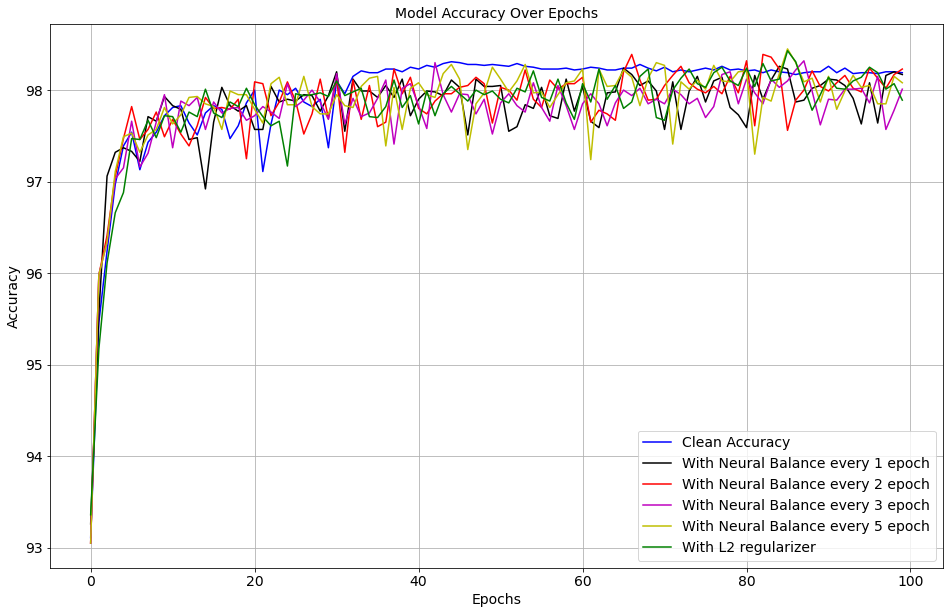

In [53]:
# Let's assume these are the accuracy values of your model over epochs
epochs_plot = list(range(100))

plt.figure(figsize=(16, 10))

# Create a simple line plot
plt.plot(epochs_plot, trained_plain, linestyle='-', color='b', label='Clean Accuracy')
plt.plot(epochs_plot, trained_with_nb_order_2_every_1, linestyle='-', color='k', label='With Neural Balance every 1 epoch')
plt.plot(epochs_plot, trained_with_nb_order_2_every_2, linestyle='-', color='r', label='With Neural Balance every 2 epoch')
plt.plot(epochs_plot, trained_with_nb_order_2_every_3, linestyle='-', color='m', label='With Neural Balance every 3 epoch')
plt.plot(epochs_plot, trained_with_nb_order_2_every_5, linestyle='-', color='y', label='With Neural Balance every 5 epoch')
plt.plot(epochs_plot, trained_w_l2, linestyle='-', color='g', label='With L2 regularizer')

# Add labels and title
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Over Epochs', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Optionally, add a grid
plt.grid(True)

plt.legend(fontsize=14)

# Show the plot
plt.show()

## L1

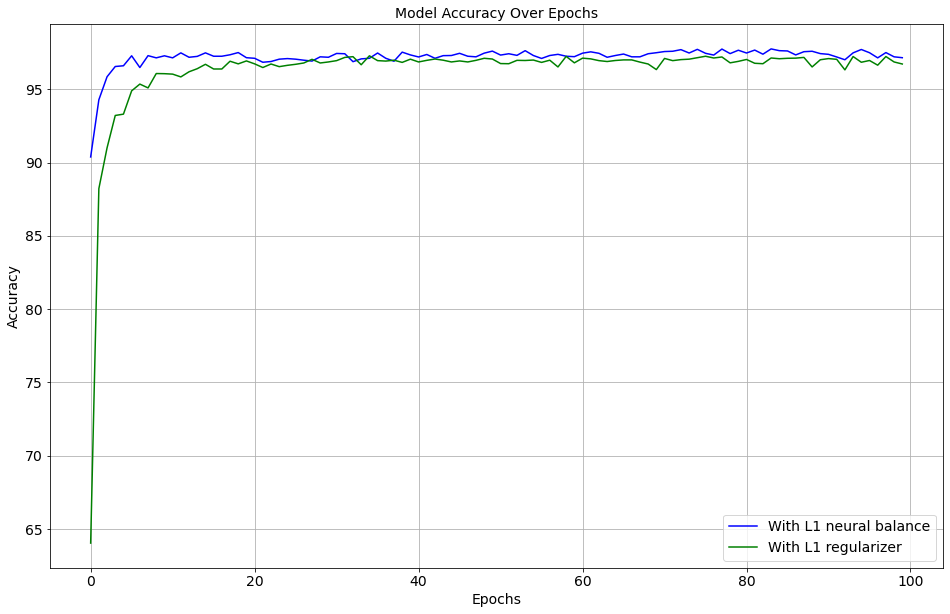

In [79]:
# Let's assume these are the accuracy values of your model over epochs
epochs_plot = list(range(100))

plt.figure(figsize=(16, 10))

# Create a simple line plot
plt.plot(epochs_plot, trained_with_nb_order_1, linestyle='-', color='b', label='With L1 neural balance')
plt.plot(epochs_plot, trained_w_l1, linestyle='-', color='g', label='With L1 regularizer')

# Add labels and title
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Over Epochs', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Optionally, add a grid
plt.grid(True)

plt.legend(fontsize=14)

# Show the plot
plt.show()

In [ ]:
# Let's assume these are the accuracy values of your model over epochs
epochs_norm = list(range(len(norms)))

plt.figure(figsize=(10, 8))

# Create a simple line plot
plt.plot(epochs_norm, norms, linestyle='-', color='b', label='Norm')

# Add labels and title
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Over Epochs', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Optionally, add a grid
plt.grid(True)

plt.legend(fontsize=14)

# Show the plot
plt.show()

# Check the weights for L1 regularization effect

## Neural Balance model

In [348]:
mlp = MLP()
mlp.load_state_dict(torch.load('logs/06_03_2024_10_43_08/model_weights.pth'))

linear_layers = []

for layer in mlp.layers:
    if(isinstance(layer, CustomLinear)):
        linear_layers.append(layer.weight)

l1_balanced = [item for tensor in linear_layers for sublist in tensor.tolist() for item in sublist]

## L1 trained model

In [349]:
mlp = MLP()
mlp.load_state_dict(torch.load('logs/06_03_2024_10_44_13/model_weights.pth'))

linear_layers = []

for layer in mlp.layers:
    if(isinstance(layer, CustomLinear)):
        linear_layers.append(layer.weight)

l1_regularized = [item for tensor in linear_layers for sublist in tensor.tolist() for item in sublist]

## Without L1 Neural Balance or L1 regularization

In [5]:
mlp_small = MLP()
mlp_small.load_state_dict(torch.load('logs/14_03_2024_15_56_13/weight.npy'))

linear_layers = []

for layer in mlp.layers:
    if(isinstance(layer, CustomLinear)):
        linear_layers.append(layer.weight)      
        
plain_weights = [item for tensor in linear_layers for sublist in tensor.tolist() for item in sublist]

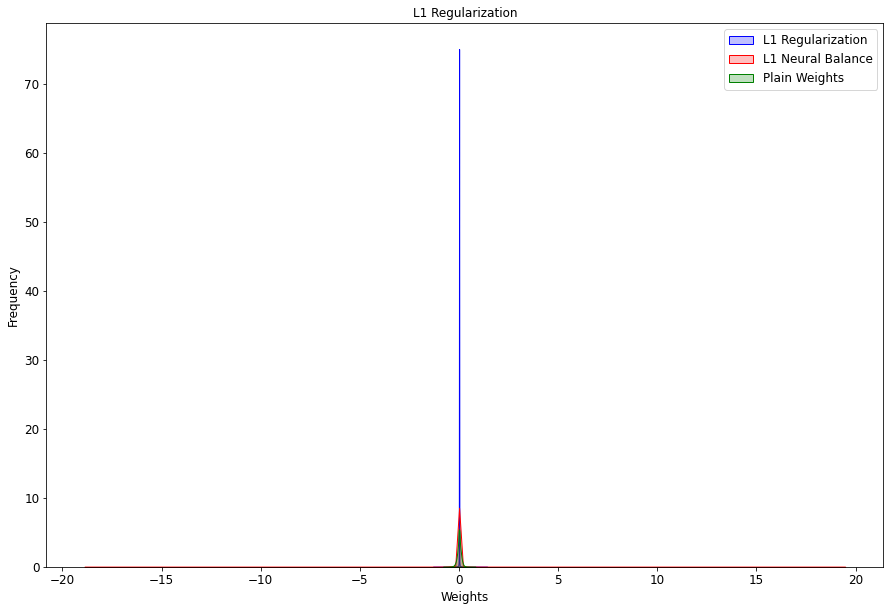

In [361]:
plt.figure(figsize=(15,10))
plt.title('L1 Regularization', fontsize='large')
sns.kdeplot(l1_regularized, color='blue', fill=True, label = 'L1 Regularization')
sns.kdeplot(l1_balanced, color='red', fill=True, label = 'L1 Neural Balance')
sns.kdeplot(plain_weights, color='green', fill=True, label = 'Plain Weights')
plt.legend(fontsize='large')
plt.xlabel('Weights', fontsize='large')
plt.ylabel('Frequency', fontsize='large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

# plt.xlim(-.2, 0.2)
# plt.ylim(0,10)

plt.show()

# Check the weights for L2 regularization effect

## Neural Balance model

In [47]:
l2_balanced_every_1 = np.load("logs/14_03_2024_14_51_05/weights.npy")
l2_balanced_every_2 = np.load("logs/14_03_2024_16_26_08/weights.npy")
l2_balanced_every_3 = np.load("logs/14_03_2024_16_41_03/weights.npy")
l2_balanced_every_5 = np.load("logs/14_03_2024_16_53_36/weights.npy")


## L2 trained model

In [32]:
l2_regularized = np.load("logs/14_03_2024_15_39_48/weights.npy")

## Plain Weights

In [11]:
plain_weights = np.load("logs/14_03_2024_15_56_13/weights.npy")

In [ ]:
plt.plot(epochs_plot, trained_plain, linestyle='-', color='b', label='Clean Accuracy')
plt.plot(epochs_plot, trained_with_nb_order_2_every_1, linestyle='-', color='k', label='With Neural Balance every 1 epoch')
plt.plot(epochs_plot, trained_with_nb_order_2_every_2, linestyle='-', color='r', label='With Neural Balance every 2 epoch')
plt.plot(epochs_plot, trained_w_l2, linestyle='-', color='g', label='With L2 regularizer')

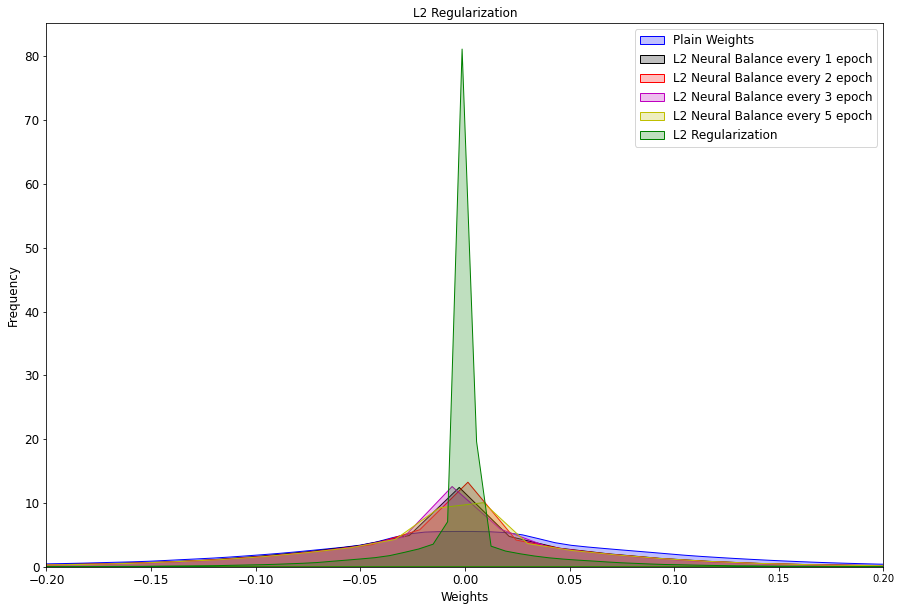

In [58]:
plt.figure(figsize=(15,10))
plt.title('L2 Regularization', fontsize='large')
sns.kdeplot(plain_weights, color='b', fill=True, label = 'Plain Weights')
sns.kdeplot(l2_balanced_every_1, color='k', fill=True, label = 'L2 Neural Balance every 1 epoch')
sns.kdeplot(l2_balanced_every_2, color='r', fill=True, label = 'L2 Neural Balance every 2 epoch')
sns.kdeplot(l2_balanced_every_3, color='m', fill=True, label = 'L2 Neural Balance every 3 epoch')
sns.kdeplot(l2_balanced_every_5, color='y', fill=True, label = 'L2 Neural Balance every 5 epoch')
sns.kdeplot(l2_regularized, color='g', fill=True, label = 'L2 Regularization')
plt.legend(fontsize='large')
plt.xlabel('Weights', fontsize='large')
plt.ylabel('Frequency', fontsize='large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.xlim(-.2, 0.2)
# plt.ylim(0,10)

plt.show()

## Check lambda of model trained with L2 regularization

In [138]:
linear_layers = []
for layer in mlp.layers:
    if(isinstance(layer, CustomLinear)):
        linear_layers.append(layer)

In [139]:
norm = []
order = 2
for count, linear in enumerate(linear_layers):
    if count==0 or count == len(linear_layers)-1:
        continue
    previous_layer = linear_layers[count-1]
    
    incoming = torch.linalg.norm(previous_layer.weight, dim=1, ord=order)
    outgoing = torch.linalg.norm(linear.weight, dim=0, ord=order)
    optimal_l = torch.sqrt(outgoing/incoming)
    norm.append(optimal_l)

In [141]:
norm

[tensor([0.6853, 0.5994, 0.8178, 0.6677, 0.7518, 0.6262, 0.5696, 0.5211, 0.6329,
         0.6324, 0.7035, 0.7638, 0.5546, 0.5588, 0.6591, 0.6067, 0.5561, 0.5515,
         0.6183, 0.5134, 0.5760, 0.6321, 0.6827, 0.7477, 0.4772, 0.8116, 0.6622,
         0.7351, 0.6916, 0.6303, 0.5436, 0.5898, 0.5997, 0.6472, 0.6201, 0.8156,
         0.6986, 0.6924, 0.7015, 0.5740, 0.6279, 0.6217, 0.6729, 0.6966, 0.5097,
         0.5376, 0.5650, 0.7020, 0.6922, 0.5495, 0.5543, 0.6295, 0.5541, 0.5799,
         0.6411, 0.6096, 0.5918, 0.5630, 0.5946, 0.6193, 0.5818, 0.5950, 0.7954,
         0.6906, 0.8478, 0.6051, 0.5214, 0.6169, 0.6191, 0.6220, 0.5499, 0.7064,
         0.6807, 0.6282, 0.5713, 0.6010, 0.5413, 0.5613, 0.5712, 0.5921, 0.7027,
         0.7140, 0.5493, 0.6111, 0.7976, 0.5357, 0.7731, 0.7054, 0.5135, 0.5282,
         0.6727, 0.6277, 0.7962, 0.4975, 0.8506, 0.6816, 0.6254, 0.5381, 0.7685,
         0.6763, 0.8054, 0.5553, 0.6390, 0.8358, 0.7098, 0.7266, 0.5952, 0.5563,
         0.7349, 0.6924, 0.5